##Implementing Graph Theory in Python to Solve an Airlines Challenge


And finally, we get to work with data in Python! In this dataset, we have records of over 7 million flights from the USA. The below variables have been provided:

- Origin and destination
- Scheduled time of arrival and departure
- Actual time of arrival and departure
- Date of the journey
- Distance between the source and destination
- Total airtime of the flight



Source: https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/

In [0]:
# Importing modules
import pandas as pd
import numpy as np


In [0]:
# Loading data 
data = pd.read_csv('data.csv')

In [0]:
# Display data
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [0]:
import networkx as nx
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

In [0]:
df.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [0]:
df.edges()

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

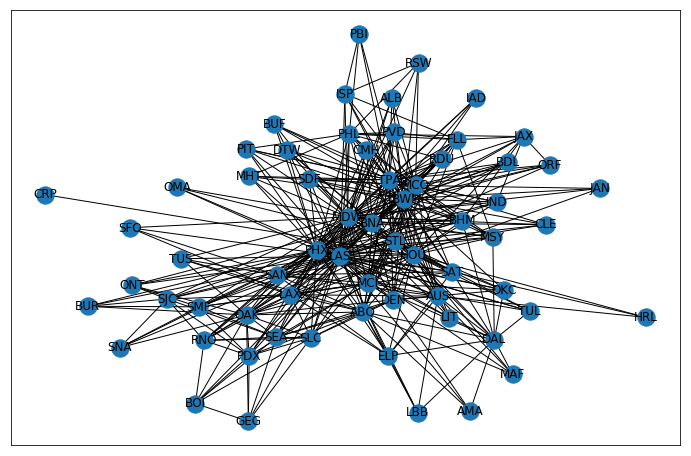

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

Let’s try to calculate the shortest path based on the airtime between the airports AMA and PBI. We will be using **Dijkstra’s shortest path algorithm.** This algorithm finds the shortest path from a source vertex to all the vertices of the given graph. Let me give you a brief run through of the steps this algorithm follows:

1. Creates a sptSet (Shortest Path Tree Set) which keeps track of vertices included in the shortest path tree, i.e., minimum distance from the source vertex is calculated and finalized. Initially, this set is empty.
2. Assign a distance value to all vertices in the input graph. We assign a value of 0 to the source vertex and a value of INFINITE to all the remaining vertices.
3. Until the sptSet does not include all the vertices, we follow these sub-steps:
          - Pick a vertex which is not in the sptSet and is closest to the source vertex
          - Include that vertex in the sptSet
          - Update the distances of all adjacent vertices

Let us take an example to understand this algorithm in a better way:

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot-from-2018-09-12-15-54-15.png)

Here the source vertex is A. The numbers represent the distance between the vertices. Initially, the sptSet is empty so we will assign distances to all the vertices. The distances are:

{0, INF, INF, INF, INF, INF}, where INF represents INFINITE.

Now, we will pick the vertex with the minimum distance, i.e., A and it will be included in the sptSet. So, the new sptSet is {A}. The next step is to pick a vertex which is not in the sptSet and is closest to the source vertex. This, in our case, is B with a distance value of 2. So this will be added to the sptSet.

sptSet = {A,B}

Now we will update the distances of vertices adjacent to vertex B:

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot-from-2018-09-12-15-56-04.png)


The distance value of the vertex F becomes 6. We will again pick the vertex with the minimum distance value which is not already included in SPT (C with a distance value of 4).

sptSet = {A,B,C}

We will follow similar steps until all the vertices are included in the sptSet. Let’s implement this algorithm and try to calculate the shortest distance between the airports. We will use the dijkstra_path() function of networkx to do so:

In [0]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

This is the shortest possible path between the two airports based on the distance between them. We can also calculate the shortest path based on the airtime just by changing the hyperparameter weight=’AirTime’:

In [0]:
shortest_path_airtime = nx.dijkstra_path(df, source='AMA', target='PBI', weight='AirTime')
shortest_path_airtime

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']